In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import pearsonr
import pandas as pd
%matplotlib inline

In [7]:
file = r'G:\vid_test\temp_images\0.0.png'

In [8]:
image = cv2.imread(file,0)
image.shape

(500, 371)

In [37]:
angle = 0
M = cv2.getRotationMatrix2D((380,320), angle, 1.0)
rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

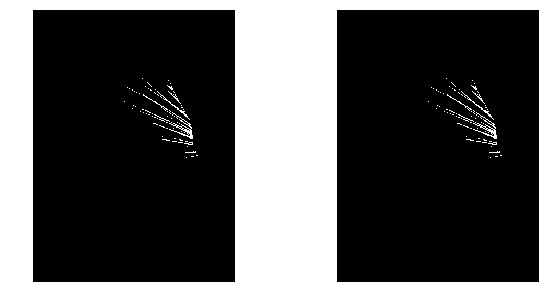

In [38]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1, 2, 1)   
ax.axis('off')
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
ax = f.add_subplot(1, 2, 2)   
ax.axis('off')
ax.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))  

In [77]:
%%timeit
#st = time.time()
correl = cv2.matchTemplate(image, rotated, cv2.TM_CCORR_NORMED)    
#end_t = time.time()-st
#correl[0], end_t

4.27 ms ± 78.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
%%timeit
#st = time.time()
correl_np = np.corrcoef(image.reshape(-1),rotated.reshape(-1))
#end_t = time.time()-st
#correl_np[0,1], end_t

4.17 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [75]:
%%timeit
#st = time.time()
df = pd.DataFrame({'a': image.reshape(-1), 'b':rotated.reshape(-1)})
df.corr()
#end_t = time.time()-st
#correl_np[0,1], end_t

4.36 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
angles = np.linspace(-4,4,20);
angles = np.insert(angles, len(angles)//2, 0)


corr_cv2= []
corr_np = []

for angle in angles:
    M = cv2.getRotationMatrix2D((380,320), angle, 1.0)
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    correl = cv2.matchTemplate(image, rotated, cv2.TM_CCORR_NORMED)    
    corr_cv2.append(correl[0])
    correl = np.corrcoef(image.reshape(-1),rotated.reshape(-1))
    corr_np.append(correl[0,1])

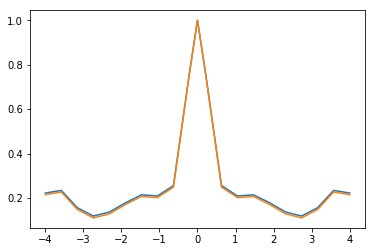

In [79]:
plt.plot(angles, corr_cv2)
plt.plot(angles, corr_np)